In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import json
from urllib import request, response, error

In [19]:
json_url = 'https://raw.githubusercontent.com/saaqebs/covid19-newjersey/master/nj_today.json'
response = request.urlopen(json_url)
todays_data = json.loads(response.read())['data']
todays_data_counter = Counter(todays_data)

In [20]:
todays_data_counter.most_common(5)

[('newark', 5300),
 ('jersey city', 5144),
 ('paterson', 4751),
 ('elizabeth', 3953),
 ('passaic', 2172)]

In [21]:
todays_data_counter.most_common()[:-5:-1]

[('quinton township', 1),
 ('loch arbour', 1),
 ('interlaken', 1),
 ('newfield', 1)]

In [22]:
url = 'https://raw.githubusercontent.com/saaqebs/covid19-newjersey/master/nj_total.csv'

In [23]:
df_historical = pd.read_csv(url)
date_nicer = lambda x: x.replace('-2020','').replace('-',' ').replace('april','April').replace('march','March')
df_historical['Date'] = df_historical['Date'].apply(date_nicer)
df_historical = df_historical.set_index('Date')

In [24]:
def get_graph_for_municipality(municipal):
    data = df_historical[df_historical['Municipal']==municipal.lower()]
    plt.plot(data['Cases'],linewidth=3)
    plt.xticks(np.array([0,5,10,15,20,25,30]))
    plt.grid(b=True, color='black',alpha=0.5,linestyle='dashed', linewidth=0.5)
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title('Tracking COVID-19 Cases in {}'.format(municipal))
    plt.show()

In [25]:
def get_graph_from_municipalities(municipals):
    lines = []
    data = []
    
    for municipal in municipals:
        curr_data = df_historical[df_historical['Municipal']==municipal.lower()]
        line, = plt.plot(curr_data['Cases'],linewidth=3,label=municipal)
        
        data.append(curr_data)
        lines.append(line)
    
    plt.legend(handles=lines, loc='upper left')
    plt.xticks(np.array([0,7,14,21,28,34]))
    plt.grid(b=True, color='black',alpha=0.5,linestyle='dashed', linewidth=0.5)
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show

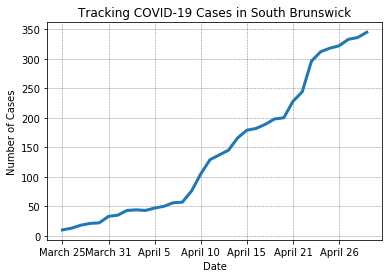

In [28]:
get_graph_for_municipality('South Brunswick')

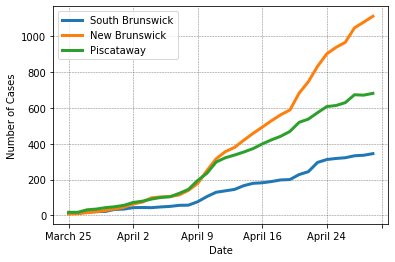

In [27]:
north = ['']
central = ['South Brunswick','New Brunswick','Piscataway']

get_graph_from_municipalities(central)